### [Buy and Hold Strategy](https://pmorissette.github.io/bt/examples.html#:~:text=and%20more%20complete.-,Buy%20and%20Hold%20Strategy,-import%20numpy%20as)


In [1]:
import warnings

import bt
import ffn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

create Fake Index Data

In [2]:
names = ["foo", "bar", "rf"]
dates = pd.date_range(start="2017-01-01", end="2017-12-31", freq=pd.tseries.offsets.BDay())
dates

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=260, freq='B')

In [3]:
n = len(dates)
zeros = np.zeros((n, len(names)))
zeros.shape

(260, 3)

In [4]:
rdf = pd.DataFrame(zeros, index=dates, columns=names)
rdf

,foo,bar,rf
2017-01-02,0.0,0.0,0.0
2017-01-03,0.0,0.0,0.0
2017-01-04,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0
2017-01-06,0.0,0.0,0.0
...,...,...,...
2017-12-25,0.0,0.0,0.0
2017-12-26,0.0,0.0,0.0
2017-12-27,0.0,0.0,0.0
2017-12-28,0.0,0.0,0.0


In [5]:
np.random.seed(1)
foo = np.random.normal(loc=0.1/n, scale=0.2/np.sqrt(n), size=n)
bar = np.random.normal(loc=0.04/n, scale=0.05/np.sqrt(n), size=n)
bar.shape

(260,)

<Axes: >

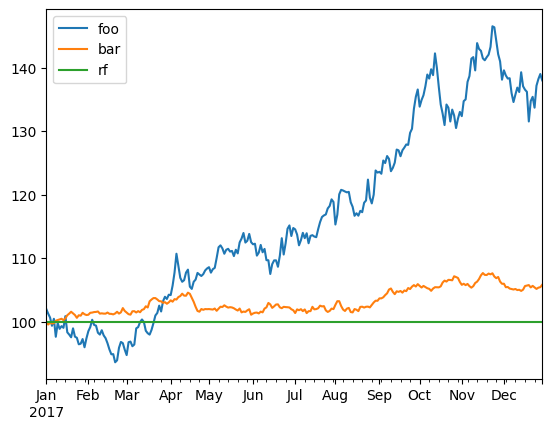

In [6]:

rdf["foo"] = foo
rdf["bar"] = bar
rdf["rf"] = 0.
pdf: pd.DataFrame = 100 * np.cumprod(1+rdf)
pdf.plot()


Build Strategy

In [7]:
from bt.algos import Rebalance, RunMonthly, WeighSpecified
from bt.backtest import Backtest, Result
from bt.core import Strategy

In [8]:
weights = pd.Series([0.6, 0.4, 0.0], index=rdf.columns)
weights

foo    0.6
bar    0.4
rf     0.0
dtype: float64

In [9]:
strategy = Strategy("static", algos=[
    RunMonthly(run_on_first_date=True),
    WeighSpecified(**weights),
    Rebalance()
])

In [10]:
# set integer_positions=False when positions are not required to be integers(round numbers)
# While the default is True, try setting to False for more robust behavior.
backtest = Backtest(strategy, pdf, integer_positions=False)

result: Result = bt.run(backtest)

<Axes: title={'center': 'Equity Progression'}>

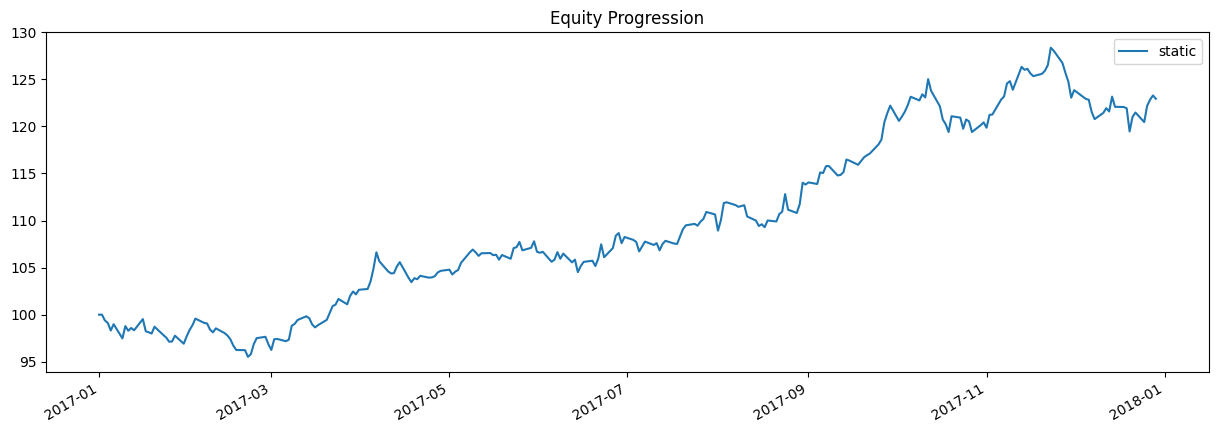

In [11]:
# 수익률
result.plot()

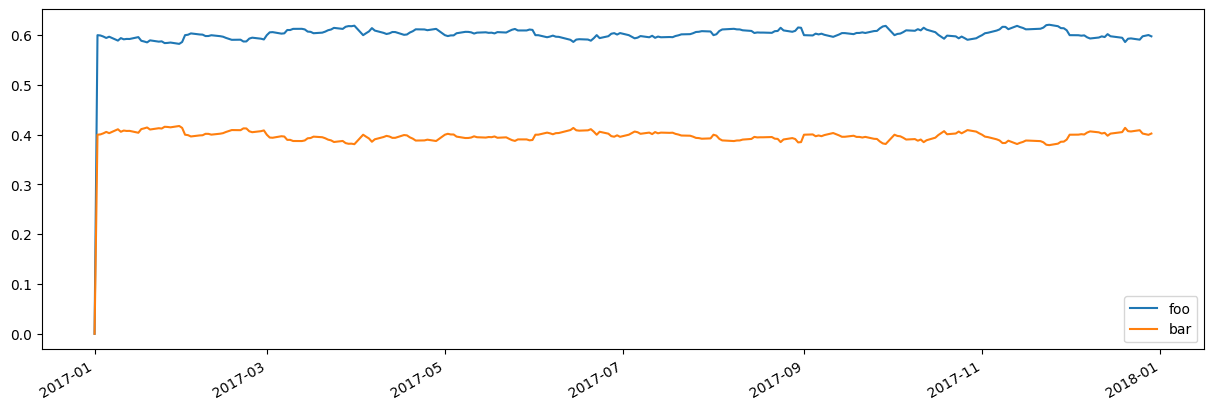

In [12]:
# 종목 비중
result.plot_security_weights()

In [13]:
result["static"]: ffn.core.PerformanceStats # type: ignore

<Axes: >

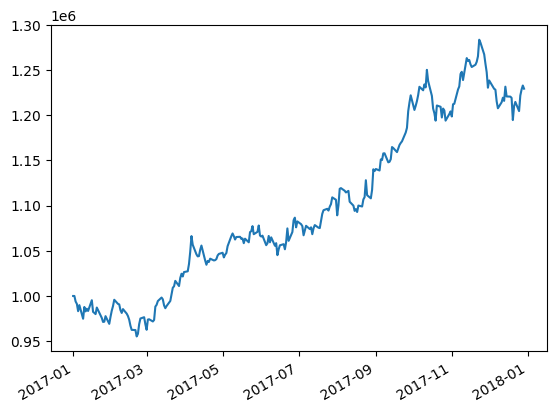

In [14]:
# Strategy value
result.backtest_list[0].strategy.values.plot()

<Axes: >

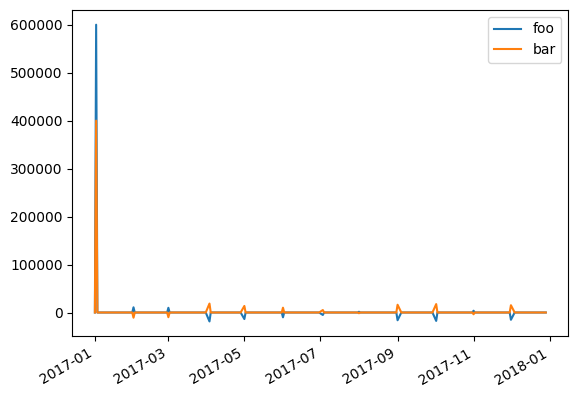

In [15]:
# 종목을 사고 파는데 사용된 금액 ( 달러 )
result.backtest_list[0].strategy.outlays.plot()

In [16]:
# 주식수의 변화 1
security_names = result.backtest_list[0].strategy.outlays.columns

# 주식수의 변화 2 ( 동일표현 )
result.backtest_list[0].strategy.outlays / pdf.loc[:, security_names]

# 주식수의 변화 3 ( 동일표현 )
result.backtest_list[0].positions.diff(1)

,foo,bar
2017-01-01,NaN,NaN
2017-01-02,5879.285683,3998.068018
2017-01-03,0.000000,0.000000
2017-01-04,0.000000,0.000000
2017-01-05,0.000000,0.000000
...,...,...
2017-12-25,0.000000,0.000000
2017-12-26,0.000000,0.000000
2017-12-27,0.000000,0.000000
2017-12-28,0.000000,0.000000
